In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import nbformat
from scipy.stats import gaussian_kde
import geopandas as gpd
import contextily as ctx

In [512]:
# globally mute warnings
import warnings
warnings.filterwarnings("ignore")

# Financial Data

In [513]:
# read the data
df = pd.read_csv('../../data/processed/cdp_summary_processed_v2.csv')

In [514]:
jet_blue_mkt_cap = df[df['companyname'] == 'Jetblue Airways Corporation']['mkt cap'].values[-1]
gm_mkt_cap = df[df['companyname'] == 'General Motors Company']['mkt cap'].values[-1]

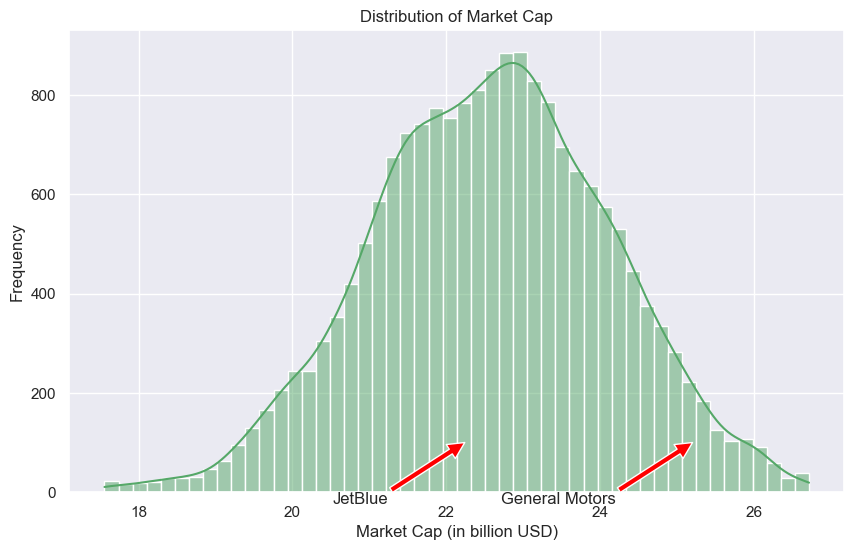

In [515]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['mkt cap'], kde=True, color='g', bins=50)
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_mkt_cap, 100), xytext=(jet_blue_mkt_cap  - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_mkt_cap, 100), xytext=(gm_mkt_cap - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/mkt_cap_dist.png')

plt.show()

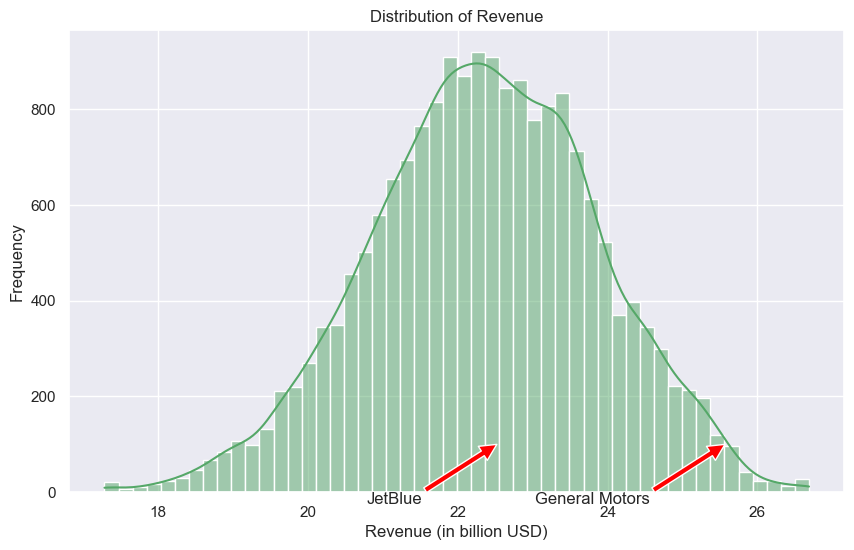

In [516]:
# do the same for revenue
jet_blue_revenue = df[df['companyname'] == 'Jetblue Airways Corporation']['revenue'].values[-1]
gm_revenue = df[df['companyname'] == 'General Motors Company']['revenue'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], kde=True, color='g', bins=50)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_revenue, 100), xytext=(jet_blue_revenue - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_revenue, 100), xytext=(gm_revenue - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/revenue_dist.png')
plt.show()

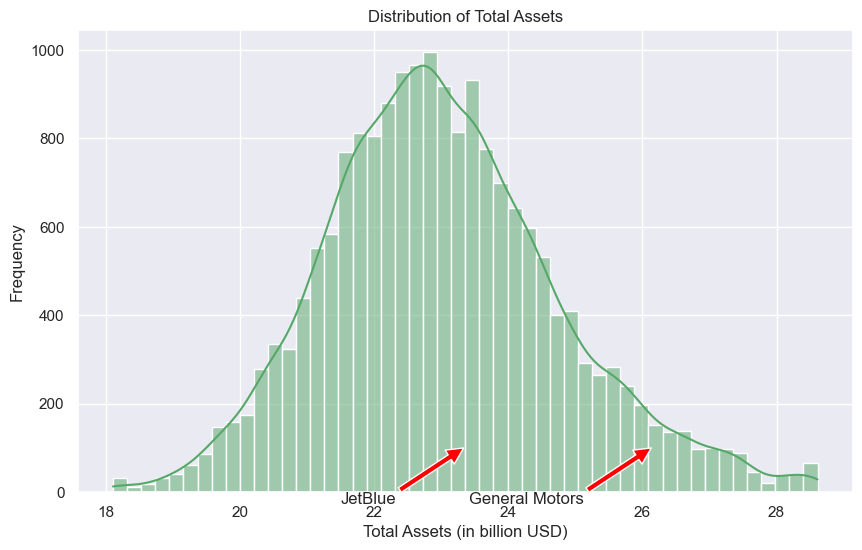

In [517]:
# do the same for tot assets
jet_blue_tot_assets = df[df['companyname'] == 'Jetblue Airways Corporation']['tot assets'].values[-1]
gm_tot_assets = df[df['companyname'] == 'General Motors Company']['tot assets'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['tot assets'], kde=True, color='g', bins=50)
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets (in billion USD)')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_tot_assets, 100), xytext=(jet_blue_tot_assets - 1, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_tot_assets, 100), xytext=(gm_tot_assets - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/tot_assets_dist.png')
plt.show()

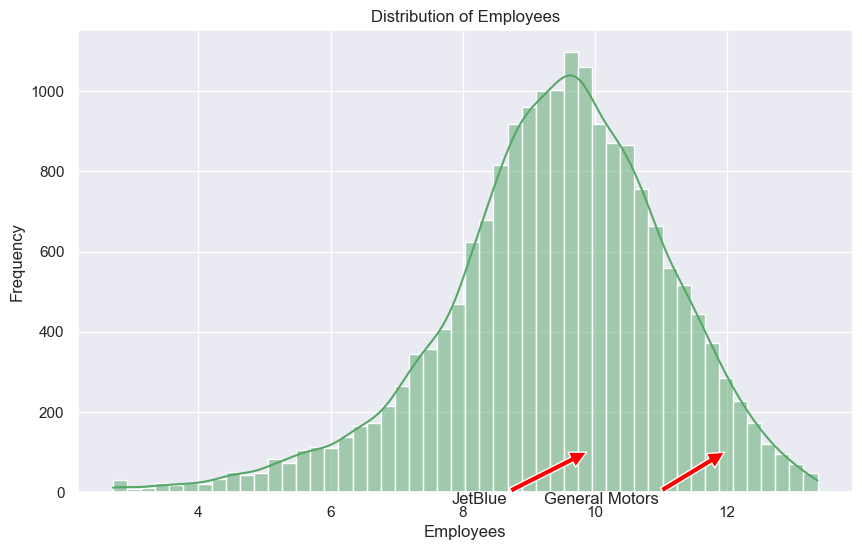

In [518]:
# do the same for employees
jet_blue_employees = df[df['companyname'] == 'Jetblue Airways Corporation']['employees'].values[-1]
gm_employees = df[df['companyname'] == 'General Motors Company']['employees'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['employees'], kde=True, color='g', bins=50)
plt.title('Distribution of Employees')
plt.xlabel('Employees')
plt.ylabel('Frequency')
plt.annotate('JetBlue', xy=(jet_blue_employees, 100), xytext=(jet_blue_employees - 1.2, -0.00002),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors', xy=(gm_employees, 100), xytext=(gm_employees - 1, -0.00002),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')

plt.savefig('../../thesis_tex/figures/financial_preds/employees_dist.png')
plt.show()

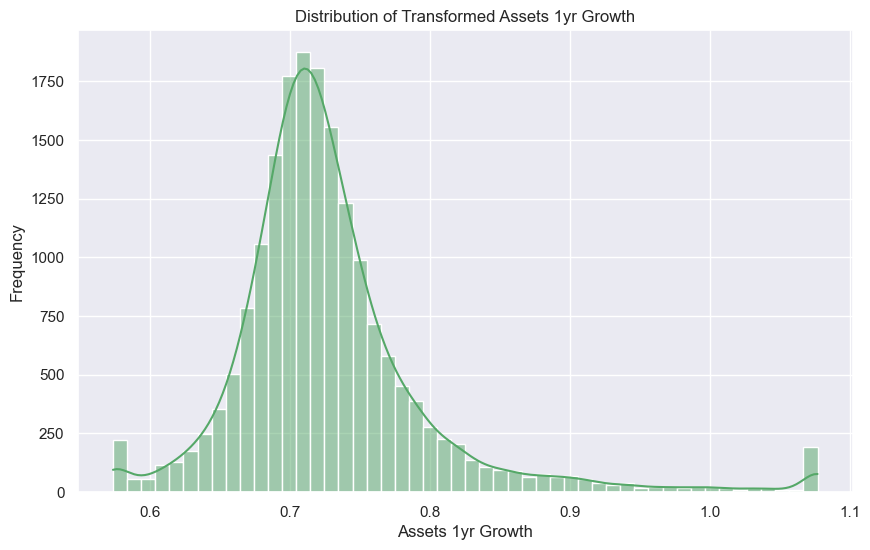

In [519]:
# do the same for assets 1yr growth
jet_blue_assets_1yr_growth = df[df['companyname'] == 'Jetblue Airways Corporation']['assets 1y gr'].values[-1]
gm_assets_1yr_growth = df[df['companyname'] == 'General Motors Company']['assets 1y gr'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['assets 1y gr'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Assets 1yr Growth')
plt.xlabel('Assets 1yr Growth')
plt.ylabel('Frequency')

plt.savefig('../../thesis_tex/figures/financial_preds/assets_1yr_growth_dist.png')
plt.show()

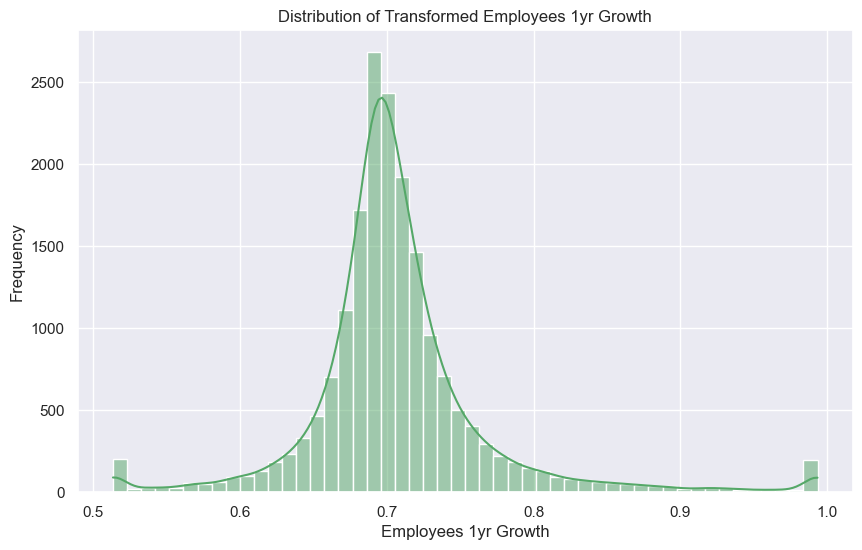

In [520]:
# do the same for employees 1yr growth
jet_blue_employees_1yr_growth = df[df['companyname'] == 'Jetblue Airways Corporation']['employees 1y gr'].values[-1]
gm_employees_1yr_growth = df[df['companyname'] == 'General Motors Company']['employees 1y gr'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['employees 1y gr'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Employees 1yr Growth')
plt.xlabel('Employees 1yr Growth')
plt.ylabel('Frequency')

plt.savefig('../../thesis_tex/figures/financial_preds/employees_1yr_growth_dist.png')
plt.show()

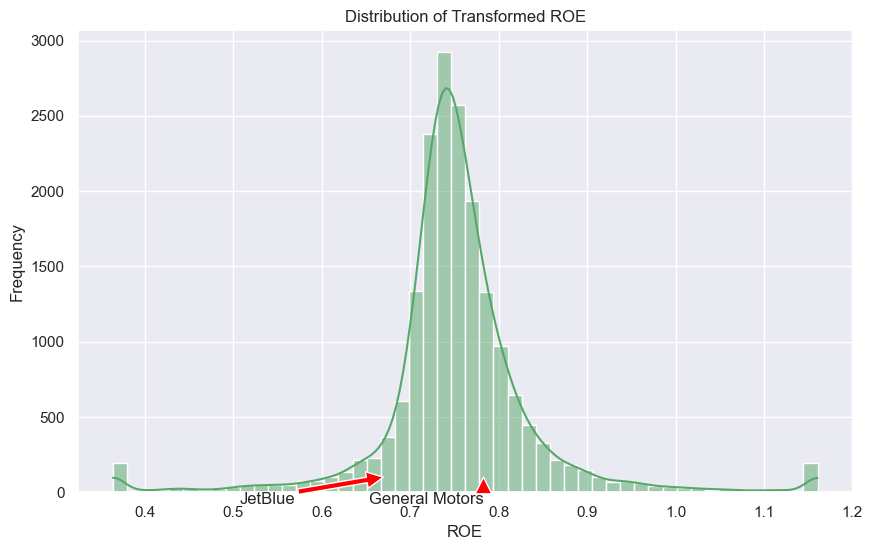

In [521]:
# do the same for roe
jet_blue_roe = df[df['companyname'] == 'Jetblue Airways Corporation']['roe'].values[-1]
gm_roe = df[df['companyname'] == 'General Motors Company']['roe'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['roe'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed ROE')
plt.xlabel('ROE')
plt.ylabel('Frequency')


plt.savefig('../../thesis_tex/figures/financial_preds/roe_dist.png')
plt.show()

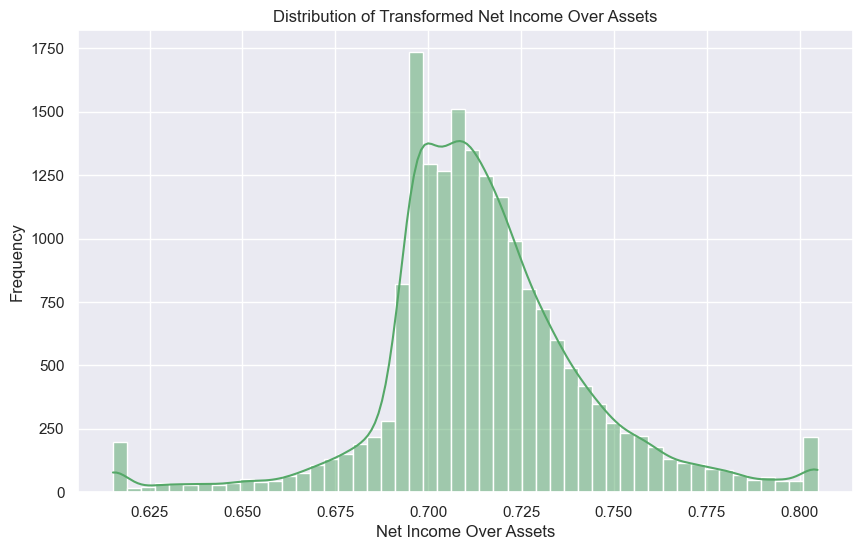

In [522]:
# do the same for net_income_over_assets
jet_blue_net_income_over_assets = df[df['companyname'] == 'Jetblue Airways Corporation']['net_income_over_assets'].values[-1]
gm_net_income_over_assets = df[df['companyname'] == 'General Motors Company']['net_income_over_assets'].values[-1]

plt.figure(figsize=(10, 6))
sns.histplot(df['net_income_over_assets'], kde=True, color='g', bins=50)
plt.title('Distribution of Transformed Net Income Over Assets')
plt.xlabel('Net Income Over Assets')
plt.ylabel('Frequency')

plt.savefig('../../thesis_tex/figures/financial_preds/net_income_over_assets_dist.png')
plt.show()

#  now let's do emissions breakdown by country and continent

# continent

In [523]:
# emission breakdown by continent with count, number of firms, mean, median, std
emission_breakdown = df.groupby('continent')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown = np.round(emission_breakdown, 2)

# add  a column with the number of firms (unique companies) in each continent
emission_breakdown['\# firms'] = df.groupby('continent')['id'].nunique()

# move number of firms to the first column
emission_breakdown = emission_breakdown[['\# firms', 'mean', 'median', 'std']]

# percentage symbol in each cell but the count
emission_breakdown['mean'] = emission_breakdown['mean'].astype(str) + '\%'
emission_breakdown['median'] = emission_breakdown['median'].astype(str) + '\%'
emission_breakdown['std'] = emission_breakdown['std'].astype(str) + '\%'

# capitalize column names
emission_breakdown.columns = [col.capitalize() for col in emission_breakdown.columns]

# change index name to Continent
emission_breakdown.index.name = 'Continent'


emission_breakdown.to_latex('../../thesis_tex/tables/emission_breakdown.tex', longtable=True)

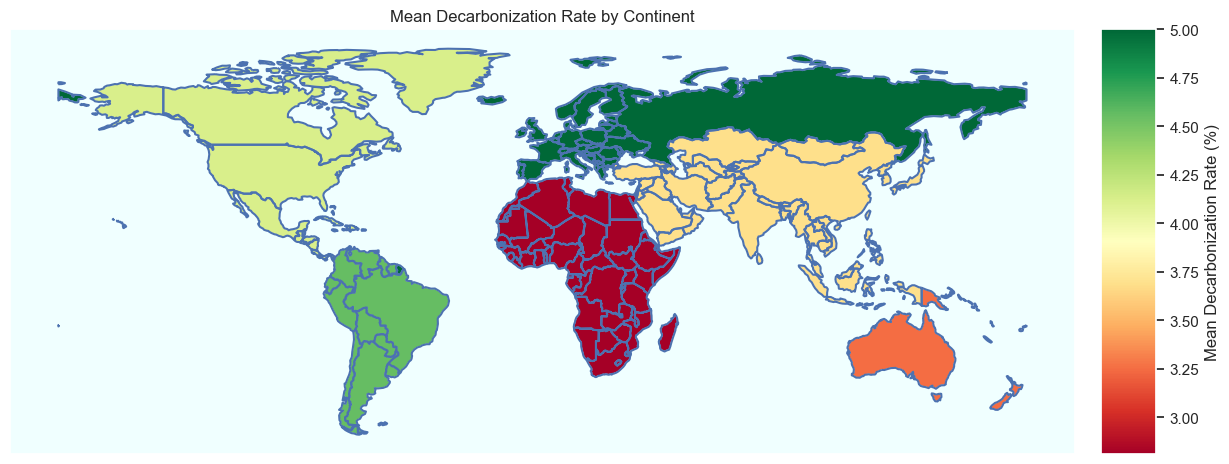

In [524]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# now plot the mean emission breadkonw by continent with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the GeoPandas DataFrame with the emission breakdown
world = world.merge(emission_breakdown, left_on='continent', right_index=True)


# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 10))

# Plot country boundaries
world.boundary.plot(ax=ax)

ax.set_facecolor('azure')

# Plot mean emissions with a color map
plot = world.plot(column='Mean', ax=ax, cmap='RdYlGn', legend=False,
           legend_kwds={'title': "Mean Decarbonization Rate (%)"})

# Create color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=2.81, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Mean Decarbonization Rate (%)')

# Adjust the legend/title manually if necessary
# This part is often context-specific and might require handling the color bar directly, as shown below
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
ax.set_title('Mean Decarbonization Rate by Continent')
plt.savefig('../../thesis_tex/figures/mean_decarbonization_rate_by_continent.png', bbox_inches='tight')
plt.show()

# industry sector

In [525]:
# do the same for sector
emission_breakdown_sector = df.groupby('gind')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_sector = np.round(emission_breakdown_sector, 2)

# percentage symbol in each cell but the count
emission_breakdown_sector['mean'] = emission_breakdown_sector['mean'].astype(str) + '\%'
emission_breakdown_sector['median'] = emission_breakdown_sector['median'].astype(str) + '\%'
emission_breakdown_sector['std'] = emission_breakdown_sector['std'].astype(str) + '\%'
emission_breakdown_sector.columns = [col.capitalize() for col in emission_breakdown_sector.columns]

# change index name to Sector
emission_breakdown_sector.index.name = 'Sector'

# add a column with the number of firms (unique companies) in each sector
emission_breakdown_sector['\# firms'] = df.groupby('gind')['id'].nunique()

# # move number of firms to the first column
emission_breakdown_sector = emission_breakdown_sector[['\# firms', 'Mean', 'Median', 'Std']]


emission_breakdown_sector.to_latex('../../thesis_tex/tables/emission_breakdown_sector.tex', longtable=True)

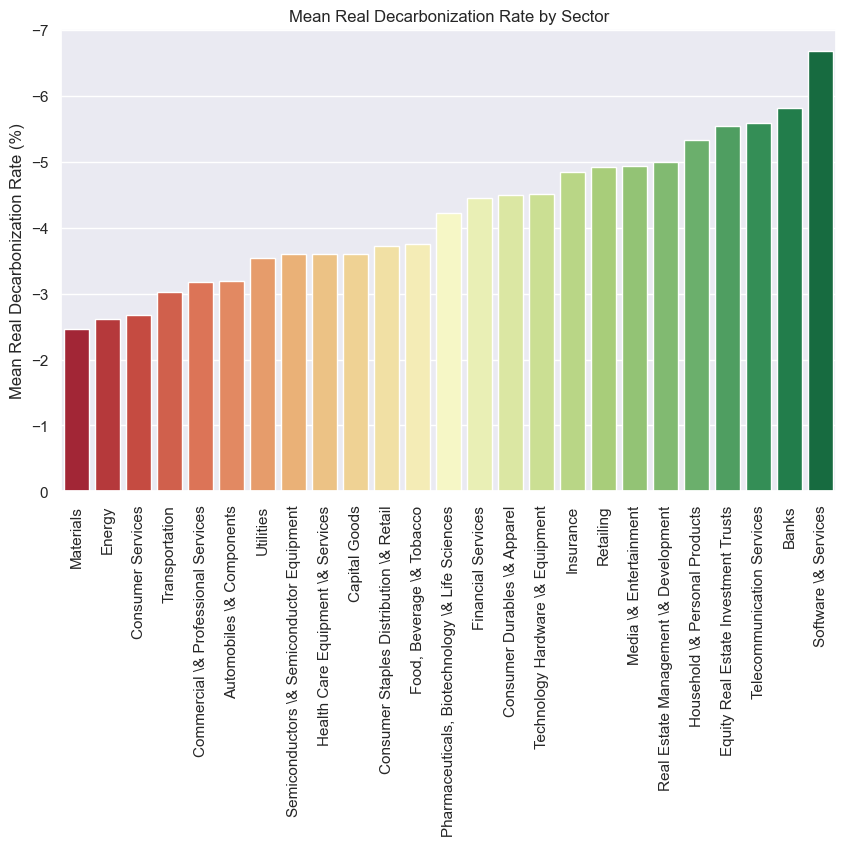

In [526]:
# do a histogram of the ghg_change_real by sector
plt.figure(figsize=(10, 6))

change_by_sector = df.groupby('gind')['ghg_change_real'].mean().reset_index()


# order by mean decarbonization rate
change_by_sector = change_by_sector.sort_values(by='ghg_change_real', ascending=False)

# x axis is the sector, y axis is the mean decarbonization rate
# palette green to red
sns.barplot(x='gind', y='ghg_change_real', data=change_by_sector, palette='RdYlGn')

# vertical ticks
plt.xticks(rotation=90)

# invert y axis
plt.gca().invert_yaxis()
# histograms with 
plt.title('Mean Real Decarbonization Rate by Sector')
plt.ylabel('Mean Real Decarbonization Rate (%)')
plt.xlabel('')

plt.savefig('../../thesis_tex/figures/mean_decarbonization_rate_by_sector.png', bbox_inches='tight')
plt.show()


In [527]:
# do the same for country
emission_breakdown_country = df.groupby('country')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_country = np.round(emission_breakdown_country, 2)

# percentage symbol in each cell but the count
emission_breakdown_country['mean'] = emission_breakdown_country['mean'].astype(str) + '\%'
emission_breakdown_country['median'] = emission_breakdown_country['median'].astype(str) + '\%'
emission_breakdown_country['std'] = emission_breakdown_country['std'].astype(str) + '\%'
emission_breakdown_country.columns = [col.capitalize() for col in emission_breakdown_country.columns]

# number of firms in each country
emission_breakdown_country['\# firms'] = df.groupby('country')['id'].nunique()

# move number of firms to the first column
emission_breakdown_country = emission_breakdown_country[['\# firms', 'Mean', 'Median', 'Std']]

# change index name to Country
emission_breakdown_country.index.name = 'Country'

emission_breakdown_country = emission_breakdown_country.sort_values('Mean', ascending=True)

# keep only the top 10
emission_breakdown_country_temp = emission_breakdown_country.iloc[:10]


emission_breakdown_country_temp.to_latex('../../thesis_tex/tables/emission_breakdown_country.tex', longtable=True)

# remove the last line of the table and then add a caption and end the longtable
with open('../../thesis_tex/tables/emission_breakdown_country.tex', 'r') as file:
    data = file.readlines()

with open('../../thesis_tex/tables/emission_breakdown_country.tex', 'w') as file:
    file.writelines(data[:-1])

with open('../../thesis_tex/tables/emission_breakdown_country.tex', 'a') as file:
    file.write('\caption{Emission Breakdown by Country}\n')
    file.write('\label{tab:emission_breakdown_country}\n')
    file.write('\end{longtable}\n')

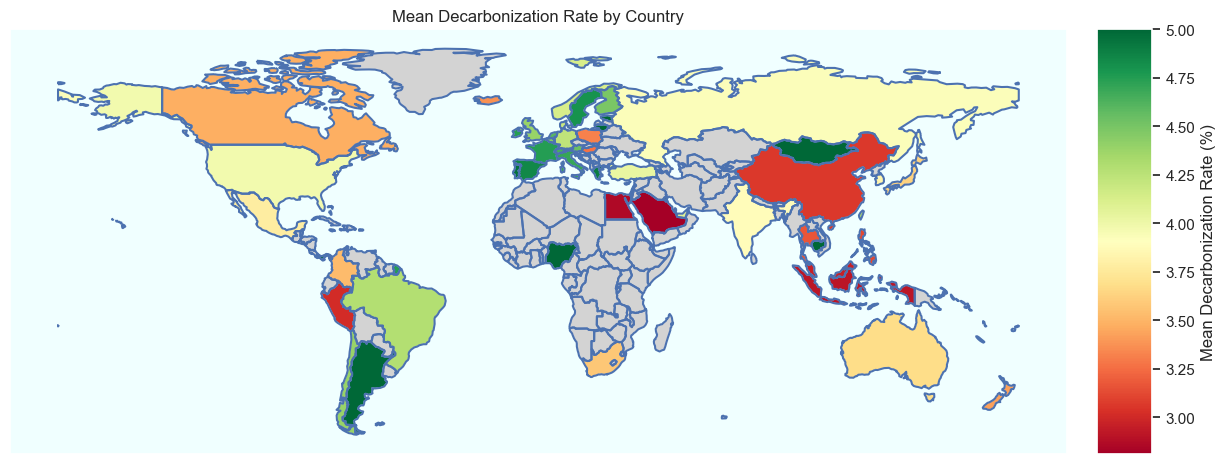

In [528]:
# now plot the mean emission breadkonw by country with geopandas


# set plt style to be ggplot
# rename USA to United States
emission_breakdown_country = emission_breakdown_country.rename(index={'USA': 'United States of America'})
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world[world['name'] != 'Antarctica']

# Merge the GeoPandas DataFrame with the emission breakdown
world = world.merge(emission_breakdown_country, how = 'left', left_on='name', right_index=True)

# Create the plot
fig, ax = plt.subplots(1, figsize=(15, 15))

ax.set_facecolor('azure')

# Plot country boundaries
world.boundary.plot(ax=ax)

# Plot mean emissions with a color map
plot = world.plot(column='Mean', ax=ax, cmap='RdYlGn', legend=False,
           legend_kwds={'title': "Mean Decarbonization Rate (%)"},
           missing_kwds={'color': 'lightgrey', 'label': 'Missing data'})

# Create color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=2.81, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Mean Decarbonization Rate (%)')

# Adjust the legend/title manually if necessary
# This part is often context-specific and might require handling the color bar directly, as shown below


# Show the plot
ax.set_title('Mean Decarbonization Rate by Country')

# remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../../thesis_tex/figures/mean_decarbonization_rate_country.png', bbox_inches='tight')
plt.show()



In [529]:
# do the same for year
emission_breakdown_year = df.groupby('year')['ghg_change_real'].agg(['count', 'mean', 'median', 'std'])
emission_breakdown_year.reset_index(inplace=True)
emission_breakdown_year.year = np.round(emission_breakdown_year.year + 2011, 0).astype(int)
emission_breakdown_year.set_index('year', inplace=True)

emission_breakdown_year = np.round(emission_breakdown_year, 2)

# percentage symbol in each cell but the count
emission_breakdown_year['mean'] = emission_breakdown_year['mean'].astype(str) + '\%'
emission_breakdown_year['median'] = emission_breakdown_year['median'].astype(str) + '\%'
emission_breakdown_year['std'] = emission_breakdown_year['std'].astype(str) + '\%'
emission_breakdown_year.columns = [col.capitalize() for col in emission_breakdown_year.columns]

# change index name to Year
emission_breakdown_year.index.name = 'Year'


emission_breakdown_year.to_latex('../../thesis_tex/tables/emission_breakdown_year.tex', longtable=True)

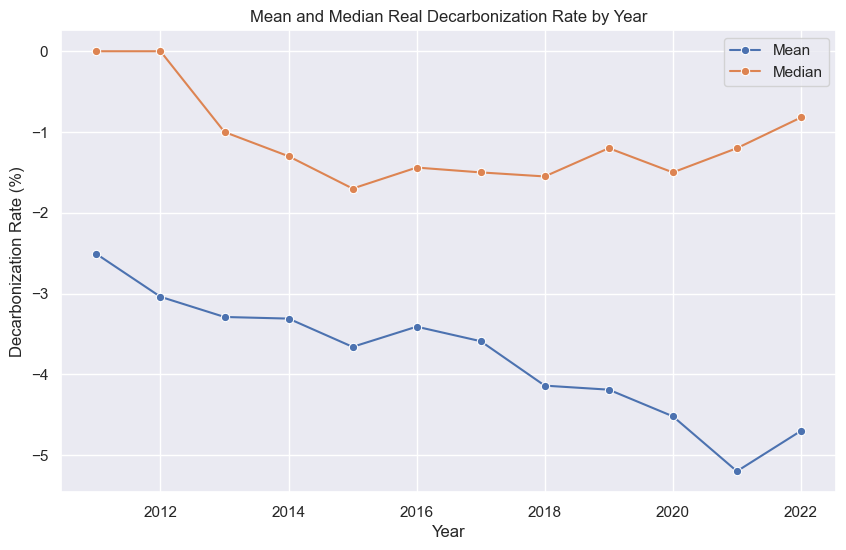

In [530]:
# plot the mean, median, std emission breakdown by year with sns and legend
plt.figure(figsize=(10, 6))
sns.lineplot(data=emission_breakdown_year['Mean'].str.replace('\%', '').astype(float), marker='o', label='Mean')
sns.lineplot(data=emission_breakdown_year['Median'].str.replace('\%', '').astype(float), marker='o', label='Median')
plt.title('Mean and Median Real Decarbonization Rate by Year')
plt.xlabel('Year')
plt.ylabel('Decarbonization Rate (%)')
plt.legend()
plt.savefig('../../thesis_tex/figures/mean_decarbonization_rate_year.png')
plt.show()

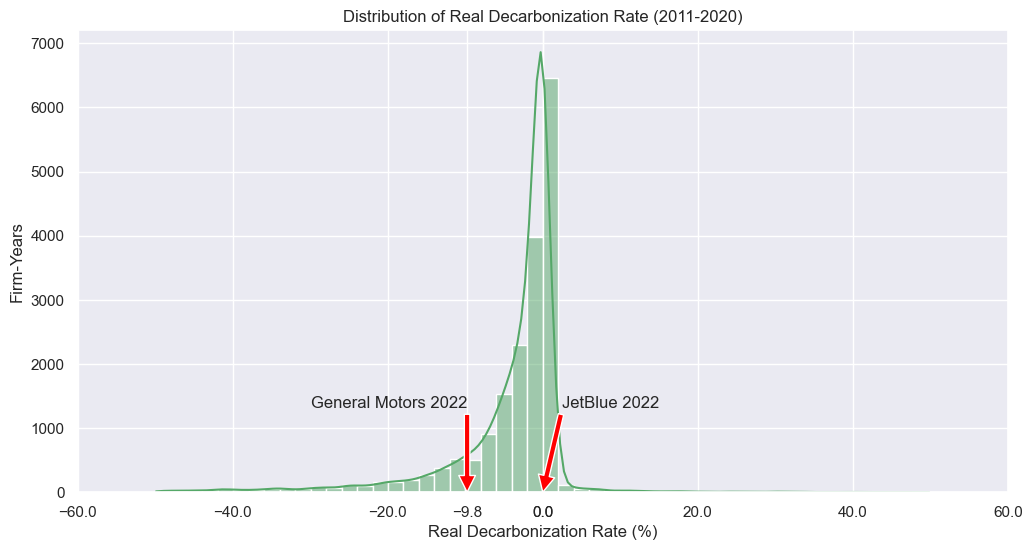

In [531]:
# distribution of ghg_change_real include jetblue and gm
plt.figure(figsize=(12, 6))
sns.histplot(df['ghg_change_real'], kde=True, color='g', bins=50)
plt.title('Distribution of Real Decarbonization Rate (2011-2020)')
plt.xlabel('Real Decarbonization Rate (%)')
plt.ylabel('Firm-Years')
plt.annotate('JetBlue 2022', xy=(jet_blue_ghg_change_real, 0), xytext=(jet_blue_ghg_change_real + 15, +1500),
             arrowprops=dict(facecolor='red', ),
             horizontalalignment='right', verticalalignment='top')
plt.annotate('General Motors 2022', xy=(gm_ghg_change_real, 0), xytext=(gm_ghg_change_real, +1500),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='right', verticalalignment='top')
# include a tick on the x axis for jetblue and gm with the value without removing the other ticks
plt.xticks(list(plt.xticks()[0]) + [jet_blue_ghg_change_real, gm_ghg_change_real])

plt.savefig('../../thesis_tex/figures/ghg_change_real_dist.png')
plt.show()
